In [4]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [5]:
from tensorflow import keras
keras.__version__

'2.6.0'

![3_35.png](./materials/3_35.png)

Keras를 사용하는 방법은 어렵지 않기 때문에 바로 MNIST 데이터를 이용해 신경망을 구현하는 예를 보인다.

11501568/11490434 [==============================] - 1s 0us/step


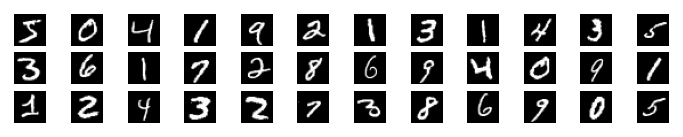

In [7]:
mnist = keras.datasets.mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
import matplotlib.pylab as plt

plt.figure(figsize=(6, 1)) 
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(X_train0[i], cmap="gray")
    plt.axis("off")
plt.show()

Keras의 MNIST 이미지 데이터는 28x28로 scikit-learn보다 고해상도이다.

In [15]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


uint8 : unsigned int, 이것은 쓸 수가 없다. 부동소수점(float)으로 바꿔야 한다.

데이터를 float 타입으로 변환 후 스케일링 한다.이는 이미지를 전처리하는 보편적인 방법 중 하나이다.

In [17]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


정답데이터는 라벨에 해당하는 숫자로 되어 있다.

In [18]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

이 값을 keras.np_utils.categorical() 을 사용하여 원핫인코딩(One-Hot-Encoding)로 변환한다.

In [11]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train0, 10)
Y_test = to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### 신경망 구현 순서

![3_36.png](./materials/3_36.png)

다음은 간단한 신경망 모형을 방금 설명한 방법으로 구현한 것이다.

In [42]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

tf.random.set_seed(0)
model = Sequential()
# Dense Layer(Dense는 꽉차게, 모든 뉴런과 뉴런 사이를 싹다 연결한 것을 의미)
# 출력 15개, 입력 784개
model.add(Dense(15, input_dim=784, activation="sigmoid"))

# 출력 10개
model.add(Dense(10, activation="sigmoid"))

# SGD
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

만들어진 모형은 summary 명령으로 모델 내부의 layers 리스트를 살펴봄으로써 내부 구조를 확인 할 수있다.

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


None은 미니배치 사이즈를 의미. 안정해져서 None이라고 표현된 것. <br>
11775, 160개는 각 층의 W와 B 갯수를 합친 것. <br>


layers 속성으로 각 레이어의 특성을 살펴볼 수도 있다.

In [44]:
l1 = model.layers[0]
l2 = model.layers[1]
print(l1.name, type(l1), l1.output_shape, l1.activation.__name__, l1.count_params())
print(l2.name, type(l1), l2.output_shape, l2.activation.__name__, l2.count_params())

dense_2 <class 'keras.layers.core.Dense'> (None, 15) sigmoid 11775
dense_3 <class 'keras.layers.core.Dense'> (None, 10) sigmoid 160


모델을 완성 했다면 fit 메서드로 트레이닝을 시작한다.

In [45]:
%%time
hist = model.fit(X_train, Y_train,
                 epochs=10, batch_size=100,
                 # epoch 끝날 때마다 validation
                 validation_data=(X_test, Y_test),
                 verbose=2)

Epoch 1/10
600/600 - 1s - loss: 0.0990 - accuracy: 0.2698 - val_loss: 0.0878 - val_accuracy: 0.3831
Epoch 2/10
600/600 - 1s - loss: 0.0867 - accuracy: 0.4191 - val_loss: 0.0853 - val_accuracy: 0.4480
Epoch 3/10
600/600 - 0s - loss: 0.0835 - accuracy: 0.4619 - val_loss: 0.0811 - val_accuracy: 0.4739
Epoch 4/10
600/600 - 0s - loss: 0.0788 - accuracy: 0.4920 - val_loss: 0.0760 - val_accuracy: 0.5149
Epoch 5/10
600/600 - 0s - loss: 0.0736 - accuracy: 0.5373 - val_loss: 0.0708 - val_accuracy: 0.5545
Epoch 6/10
600/600 - 0s - loss: 0.0684 - accuracy: 0.5762 - val_loss: 0.0657 - val_accuracy: 0.5993
Epoch 7/10
600/600 - 0s - loss: 0.0637 - accuracy: 0.6111 - val_loss: 0.0612 - val_accuracy: 0.6260
Epoch 8/10
600/600 - 0s - loss: 0.0595 - accuracy: 0.6354 - val_loss: 0.0573 - val_accuracy: 0.6467
Epoch 9/10
600/600 - 0s - loss: 0.0559 - accuracy: 0.6579 - val_loss: 0.0539 - val_accuracy: 0.6714
Epoch 10/10
600/600 - 0s - loss: 0.0528 - accuracy: 0.6830 - val_loss: 0.0510 - val_accuracy: 0.6989


학습이 끝나면 기록된 변수를 확인한다. 다음 두 그래프는 방금 학습 시킨 모델의 비용함수와 성능지표에 대한 것이다.

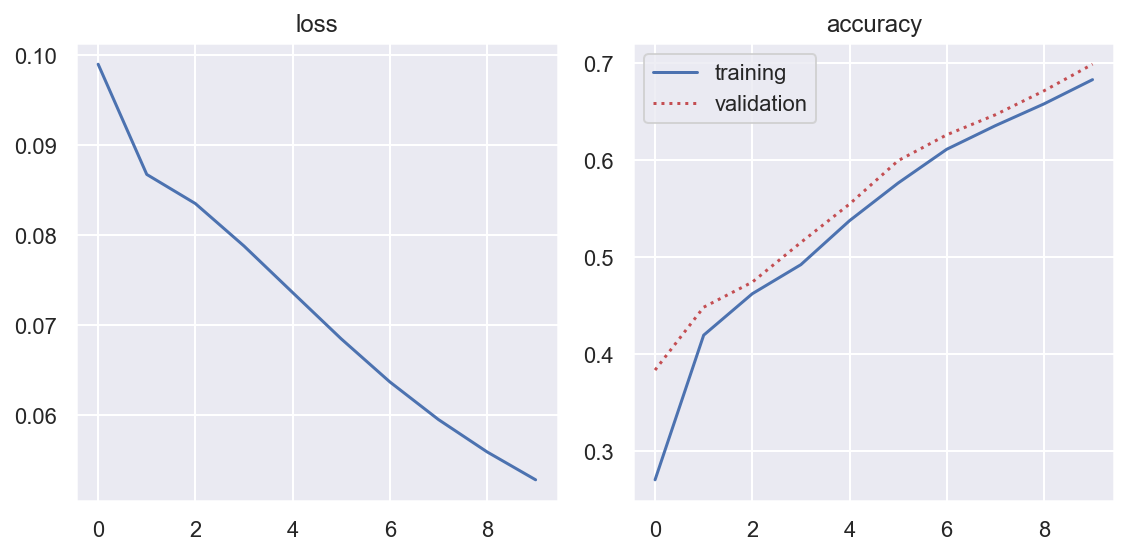

In [46]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("accuracy")
plt.plot(hist.history['accuracy'], 'b-', label="training")
plt.plot(hist.history['val_accuracy'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()

### 가중치 정보

트레이닝이 끝난 모형의 가중치 정보는 get_weights 메서드로 구할 수 있다. 이 메서드는 신경망 모형에서 사용된 가중치 값과 값을 출력한다.

In [47]:
# 첫번째 레이어
w1 = l1.get_weights()
w1[0].shape, w1[1].shape

((784, 15), (15,))

In [48]:
# 두번째 레이어 
w2 = l2.get_weights()
w2[0].shape, w2[1].shape

((15, 10), (10,))

### 모형의 사용

트레이닝이 끝난 모형은 predict 메서드로 y값을 출력하거나 출력된 y값을 각 클래스에 대한 판별함수로 가정하고 predict_classes(over V 2.5 depreciated) 메서드로 분류를 수행할수 있다. 예로 테스트 데이터셋의 첫번째 이미지를 예측하면 다음과 같다.


In [49]:
model.predict(X_test[:1, :])

array([[0.12934902, 0.04481778, 0.06268558, 0.10488045, 0.10673138,
        0.1369724 , 0.00948668, 0.6961979 , 0.13745877, 0.2140255 ]],
      dtype=float32)

In [50]:
predict_x=model.predict(X_test[:1, :]) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

array([7])

In [51]:
# model.predict_classes(X_test[:1, :], verbose=0)

# depreciated

테스트 데이터셋의 첫번째 이미지를 출력해보면 다음처럼 실제로 7이 나온다

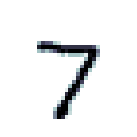

In [52]:
plt.figure(figsize=(1, 1)) 
plt.imshow(X_test0[0], cmap=plt.cm.bone_r) 
plt.grid(False)
plt.axis("off")
plt.show()

### 모형의 저장

트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 "hdf5" 형식으로 저장하였다가 나중에 load 명령으로 불러 사용 할 수있다.

In [53]:
print(model.predict(X_test[:1, :]))

[[0.12934902 0.04481778 0.06268558 0.10488045 0.10673138 0.1369724
  0.00948668 0.6961979  0.13745877 0.2140255 ]]


In [54]:
predict_x=model.predict(X_test[:1, :]) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

array([7])

In [55]:
#hd는 하둡과는 아무 관련 없음

model.save('my_model.hdf5') 
del model

In [56]:
from tensorflow.keras.models import load_model


model2 = load_model('my_model.hdf5')
print(model2.predict_classes(X_test[:1, :], verbose=0))

AttributeError: 'Sequential' object has no attribute 'predict_classes'